In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Prim's algorithm has time complexity $O(n^2)$ where $n = |V|$

For simplicity, the algorithm mentioned in the paper is refered as $A$ here.

# Notes and thoughts

## Python memory usage and simplifying $A$

Suppose $n$ is the number of vertices, $m$ is the number of machines. The size of the full graph is $8n^2$, given that each float64 takes 8 bytes in Numpy. Locally, for holding the graph, each machine locally needs
$$
  \frac{8n^2}{m}
$$
Bytes.
However, the most memory eager construction is the sendbuf during the first step, where each vertex sends edges pointing to other clusters to their cluster leaders. During the first round of the algorithm, each vertex is sending an edge to all the other vertices for the step 1 in the algorithm. Each ClusterEdge instance is a tuple with 3 elements (vertex_from, vertex_to, weight) sized 64 bytes. To send that, each machine needs to construct a buffer sized
$$
  \frac{64n^2}{m}
$$
Bytes During the first round of the original $A$. This is the most memory eager operation in the whole algorithm, But there is a walk around. During the first round, each cluster has size 1 so what rank 0 receives at the end of the iteration is the minimum edge from each vertex. We can skip step 1-3 by sending the minimum edge from each vertex to rank 0 directly.

# Comparing prim's algorithm and $A$

Run time of the prim's compared to $A$ with 1 node 4 takes. The graph is in log scale, graph size vary from $2^3$ to $2^{13}$

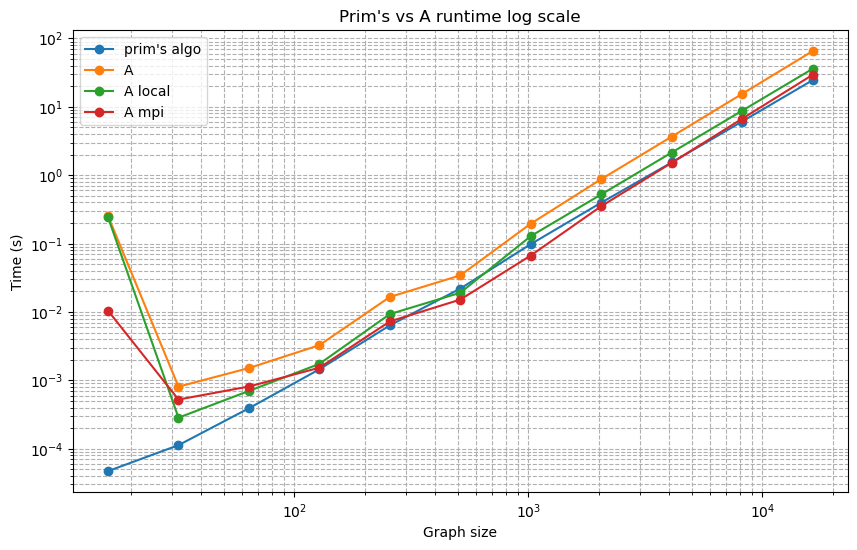

In [17]:
df = pd.read_csv('seq_vs_dist_n1_t4.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_seq'], label="prim's algo", marker='o')
plt.plot(x, df['t_dist'], label='A', marker='o')
plt.plot(x, df['t_dist_seq'], label='A local', marker='o')
plt.plot(x, df['t_dist_mpi'], label='A mpi', marker='o')

plt.xlabel('Graph size')
plt.ylabel('Time (s)')
plt.title("Prim's vs A runtime log scale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

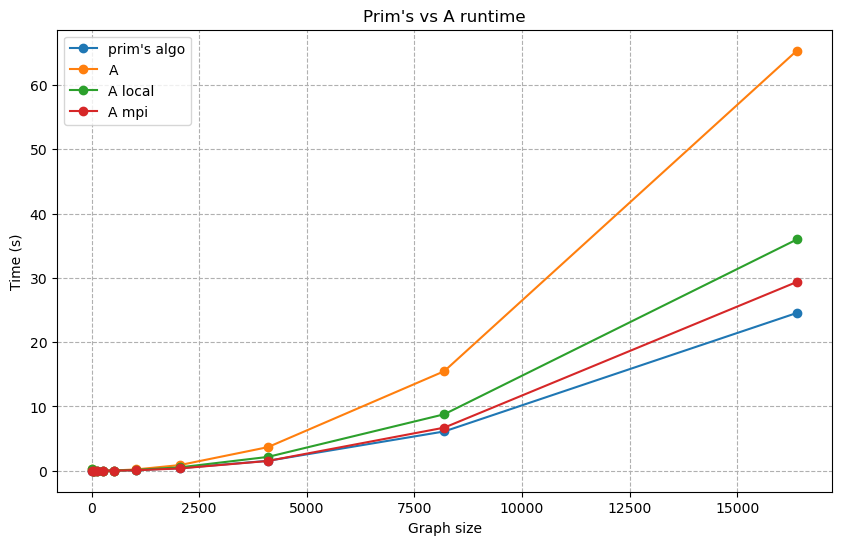

In [18]:
df = pd.read_csv('seq_vs_dist_n1_t4.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_seq'], label="prim's algo", marker='o')
plt.plot(x, df['t_dist'], label='A', marker='o')
plt.plot(x, df['t_dist_seq'], label='A local', marker='o')
plt.plot(x, df['t_dist_mpi'], label='A mpi', marker='o')

plt.xlabel('Graph size')
plt.ylabel('Time (s)')
plt.title("Prim's vs A runtime")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Number of communication rounds of $A$.

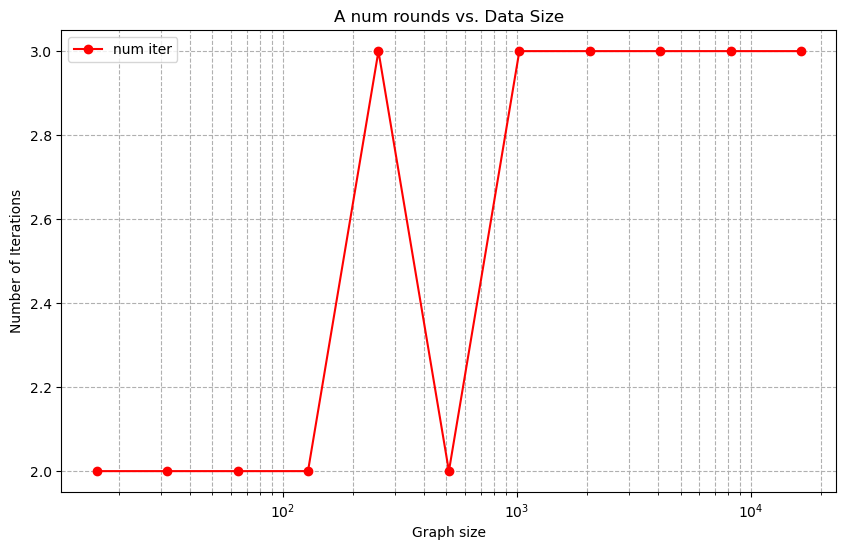

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(x, df['k_dist'], label='num iter', marker='o', color='r')

plt.xlabel('Graph size')
plt.ylabel('Number of Iterations')
plt.title('A num rounds vs. Data Size')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Running time of $A$

Graph size range from $2^4$ to $2^{15}$. Run on 1 node 8 tasks

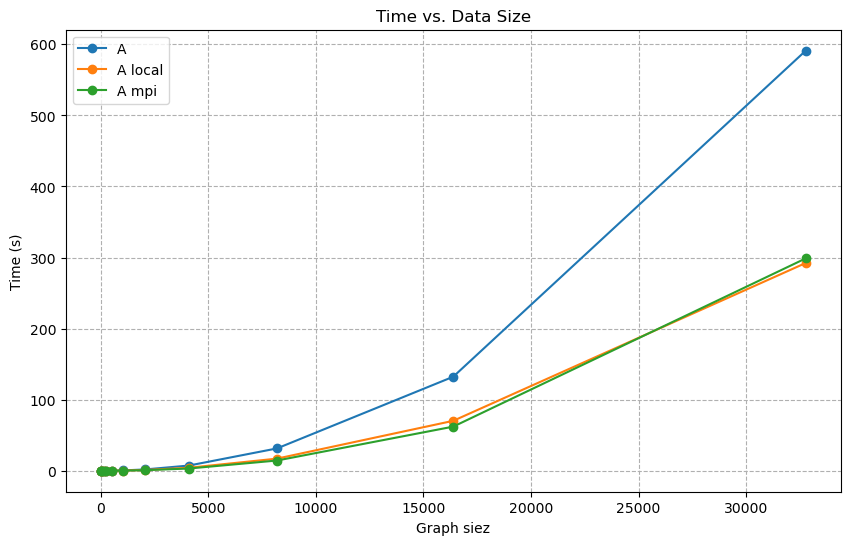

In [16]:
df = pd.read_csv('dist_n1_t8.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_dist'], label='A', marker='o')
plt.plot(x, df['t_dist_seq'], label='A local', marker='o')
plt.plot(x, df['t_dist_mpi'], label='A mpi', marker='o')

plt.xlabel('Graph size')
plt.ylabel('Time (s)')
plt.title('A runtime')
# plt.xscale('log')
# plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

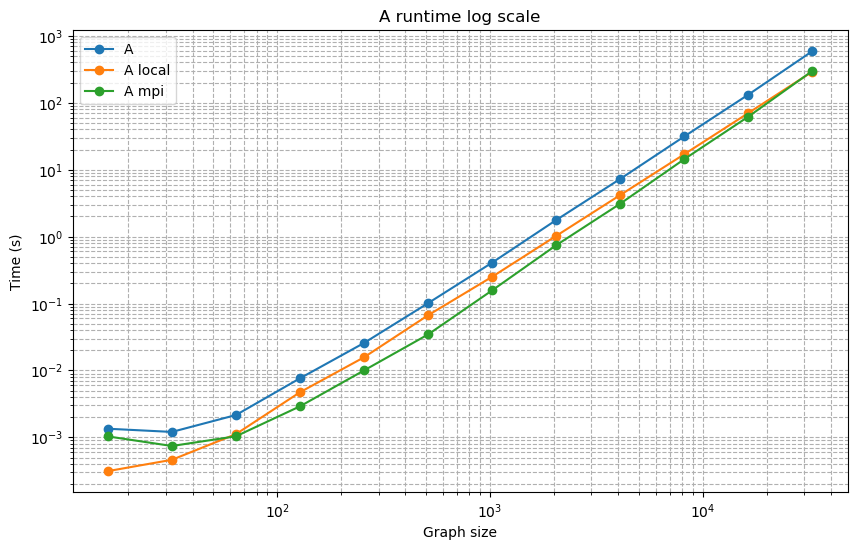

In [21]:
df = pd.read_csv('dist_n1_t8.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_dist'], label='A', marker='o')
plt.plot(x, df['t_dist_seq'], label='A local', marker='o')
plt.plot(x, df['t_dist_mpi'], label='A mpi', marker='o')

plt.xlabel('Graph size')
plt.ylabel('Time (s)')
plt.title('A runtime log scale')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

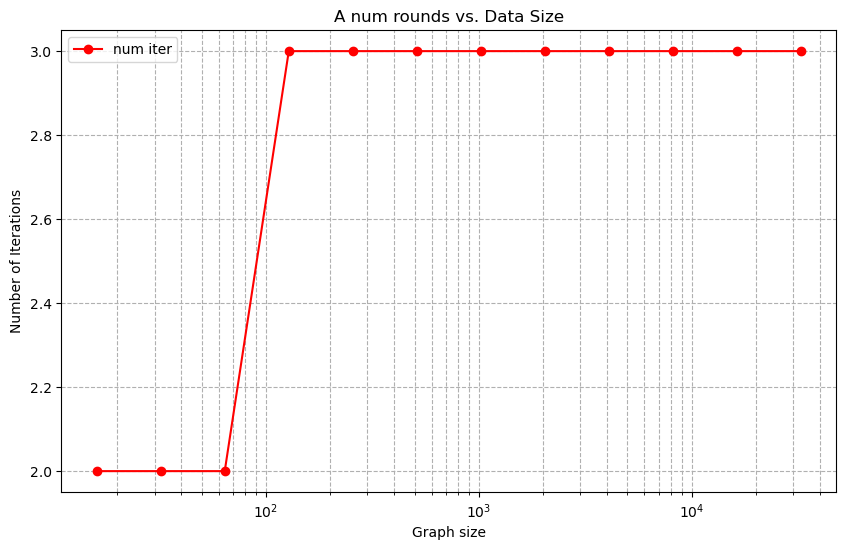

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x, df['k_dist'], label='num iter', marker='o', color='r')

plt.xlabel('Graph size')
plt.ylabel('Number of Iterations')
plt.title('A num rounds vs. Data Size')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## Note

One thing to mention here is that even the number of communication round stays low (log log n) the algorithm total run time still grow faster than linearly

## Weak scaling

In [23]:
df = pd.read_csv('weak_scaling/weak_scale.csv')

x = np.power(2, (np.arange(len(df)) + 1)) * 8

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, df['t_dist'], label='A', marker='o')
plt.plot(x, df['t_dist_seq'], label='A local', marker='o')
plt.plot(x, df['t_dist_mpi'], label='A mpi', marker='o')

plt.xlabel('Graph size')
plt.ylabel('Time (s)')
plt.title('A runtime log scale')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

KeyError: 't_dist'

<Figure size 1000x600 with 0 Axes>